In [9]:
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv("diabetes.csv")

In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
x = data.drop(labels= ['Outcome'], axis=1)

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y = data.Outcome

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain , ytrain)

/home/viraj/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
ypred = LR.predict(xtest)

In [27]:
print(ytest)
print(ypred)

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


In [28]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytest,ypred)

In [29]:
CM

array([[115,  15],
       [ 25,  37]])

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc = accuracy_score(ytest,ypred)

In [32]:
acc

0.7916666666666666

In [33]:
#Visualizing a Confusion Matrix
#So import the required modules
#Also need to import numpy but already imported
import matplotlib.pyplot as plt
import seaborn as sns


<IPython.core.display.Javascript object>


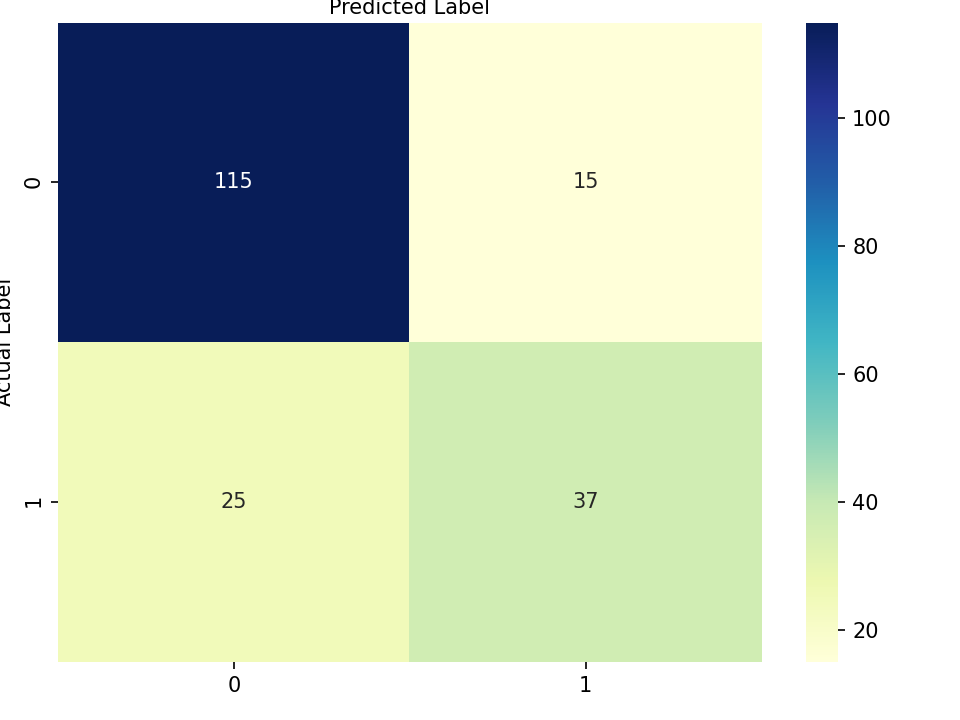

Text(0.5, 427.9555555555555, 'Predicted Label')

In [34]:
%matplotlib notebook
#For activating interactive mode of graphs
class_names = [0,1] #Names of Classes
fig , ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating a Heatmap
sns.heatmap(pd.DataFrame(CM),annot=True, cmap = "YlGnBu" , fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix" , y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [35]:
import sklearn.metrics
print("Precision:",sklearn.metrics.precision_score(ytest,ypred))

Precision: 0.7115384615384616


In [36]:
print("Recall:",sklearn.metrics.recall_score(ytest,ypred))

Recall: 0.5967741935483871


In [37]:


from matplotlib import pyplot



In [38]:
# predict probabilities
probs = LR.predict_proba(xtest)
probs

array([[0.02567954, 0.97432046],
       [0.83973789, 0.16026211],
       [0.92320927, 0.07679073],
       [0.31943906, 0.68056094],
       [0.87794571, 0.12205429],
       [0.96615977, 0.03384023],
       [0.1957837 , 0.8042163 ],
       [0.10319364, 0.89680636],
       [0.48977821, 0.51022179],
       [0.63518906, 0.36481094],
       [0.35785926, 0.64214074],
       [0.03025224, 0.96974776],
       [0.68292229, 0.31707771],
       [0.74555675, 0.25444325],
       [0.86724072, 0.13275928],
       [0.82182546, 0.17817454],
       [0.10180289, 0.89819711],
       [0.97784597, 0.02215403],
       [0.53233506, 0.46766494],
       [0.74802409, 0.25197591],
       [0.31648689, 0.68351311],
       [0.61080338, 0.38919662],
       [0.78290543, 0.21709457],
       [0.94161043, 0.05838957],
       [0.94951652, 0.05048348],
       [0.64245209, 0.35754791],
       [0.95304952, 0.04695048],
       [0.0574904 , 0.9425096 ],
       [0.89111482, 0.10888518],
       [0.87081684, 0.12918316],
       [0.

In [39]:
# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs

array([0.97432046, 0.16026211, 0.07679073, 0.68056094, 0.12205429,
       0.03384023, 0.8042163 , 0.89680636, 0.51022179, 0.36481094,
       0.64214074, 0.96974776, 0.31707771, 0.25444325, 0.13275928,
       0.17817454, 0.89819711, 0.02215403, 0.46766494, 0.25197591,
       0.68351311, 0.38919662, 0.21709457, 0.05838957, 0.05048348,
       0.35754791, 0.04695048, 0.9425096 , 0.10888518, 0.12918316,
       0.52660979, 0.24570773, 0.10122486, 0.50022831, 0.08995942,
       0.67489245, 0.49702177, 0.08545861, 0.32086867, 0.73552806,
       0.2841576 , 0.1846408 , 0.16627014, 0.82728146, 0.76346285,
       0.01190749, 0.07938944, 0.19988234, 0.41696789, 0.29036875,
       0.39052334, 0.17191842, 0.90111865, 0.53999018, 0.1219299 ,
       0.00203733, 0.06023233, 0.46436325, 0.26640329, 0.0766563 ,
       0.74969643, 0.46651884, 0.09068968, 0.69945998, 0.67218095,
       0.93639508, 0.72131249, 0.13265269, 0.33711071, 0.10867379,
       0.09687057, 0.35014282, 0.08554777, 0.96748412, 0.82967

In [40]:
#Calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(ytest,probs)
print('AUC: %.3f' % auc)

AUC: 0.860


<IPython.core.display.Javascript object>


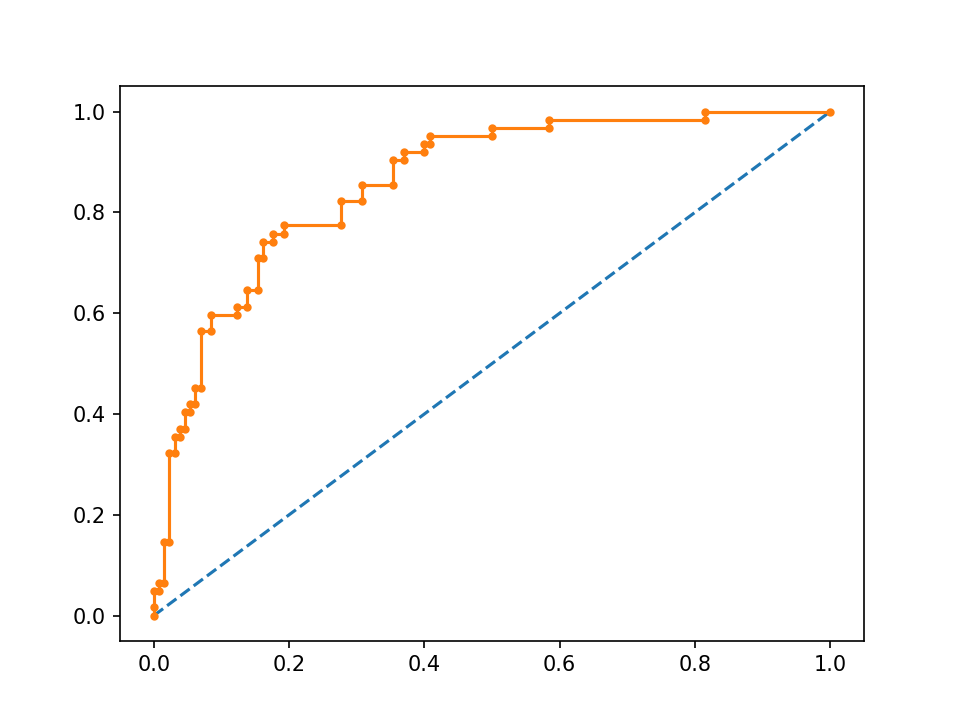

In [41]:
%matplotlib notebook
#Calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, probs)
#Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
#Show the plot
plt.show()